<a href="https://colab.research.google.com/github/agulhane090398/PythonViz/blob/main/Netflix_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **NETFLIX : CASE STUDY**

### *About NETFLIX*

Netflix is one of the most popular media and video streaming platforms. They have over 10000 movies or tv shows available on their platform, as of mid-2021, they have over 222M Subscribers globally. This tabular dataset consists of listings of all the movies and tv shows available on Netflix, along with details such as - cast, directors, ratings, release year, duration, etc.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
netflix=pd.read_csv("netflix.csv")
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
netflix.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


The data can't be used

In [ ]:
netflix.shape

(8807, 12)

We have data of 8807 shows

In [ ]:
netflix.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [ ]:
netflix['director'].nunique()

4528

In [ ]:
netflix['type'].value_counts(normalize=True)

Movie      0.696151
TV Show    0.303849
Name: type, dtype: float64

ie almost 70% of shows available is pf type Movie.

<Axes: ylabel='type'>

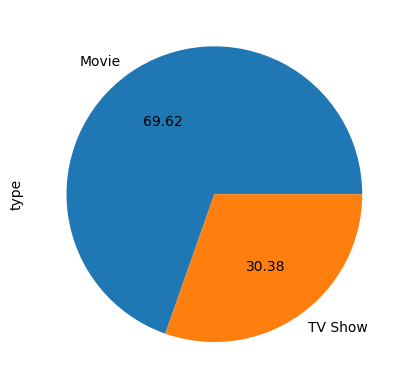

In [ ]:
netflix['type'].value_counts().plot(kind='pie',autopct="%.2f")

In [ ]:
netflix['director'].unique()

array(['Kirsten Johnson', nan, 'Julien Leclercq', ..., 'Majid Al Ansari',
       'Peter Hewitt', 'Mozez Singh'], dtype=object)

We have data of 8807 shows and have 4528 directors

In [ ]:
netflix['director'].value_counts()

Rajiv Chilaka                     19
Raúl Campos, Jan Suter            18
Marcus Raboy                      16
Suhas Kadav                       16
Jay Karas                         14
                                  ..
Raymie Muzquiz, Stu Livingston     1
Joe Menendez                       1
Eric Bross                         1
Will Eisenberg                     1
Mozez Singh                        1
Name: director, Length: 4528, dtype: int64

Rajiv Chilaka is the director with maximum movie directed

In [ ]:
'Movies added are: ' , netflix[netflix['type']=='Movie'].shape[0], 'Tv Shows added are: ' , netflix[netflix['type']=='TV Show'].shape[0]

('Movies added are: ', 6131, 'Tv Shows added are: ', 2676)

i.e. more no of movies were added compared to Tv shows

<ipython-input-15-6a354aa8811e>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=netflix,  x=netflix['type'], palette = "Set2")


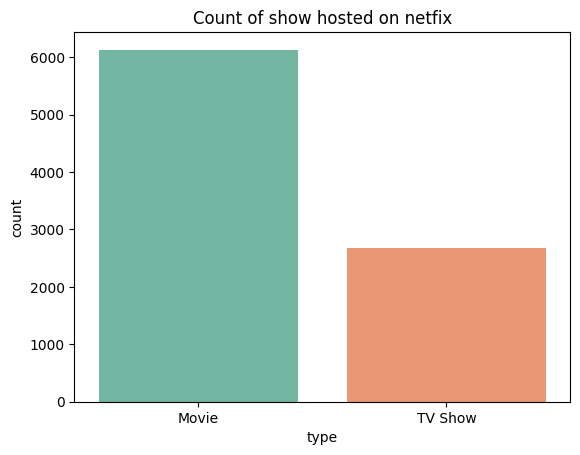

In [ ]:
sns.countplot(data=netflix,  x=netflix['type'], palette = "Set2")
plt.title('Count of show hosted on netfix')
plt.show()

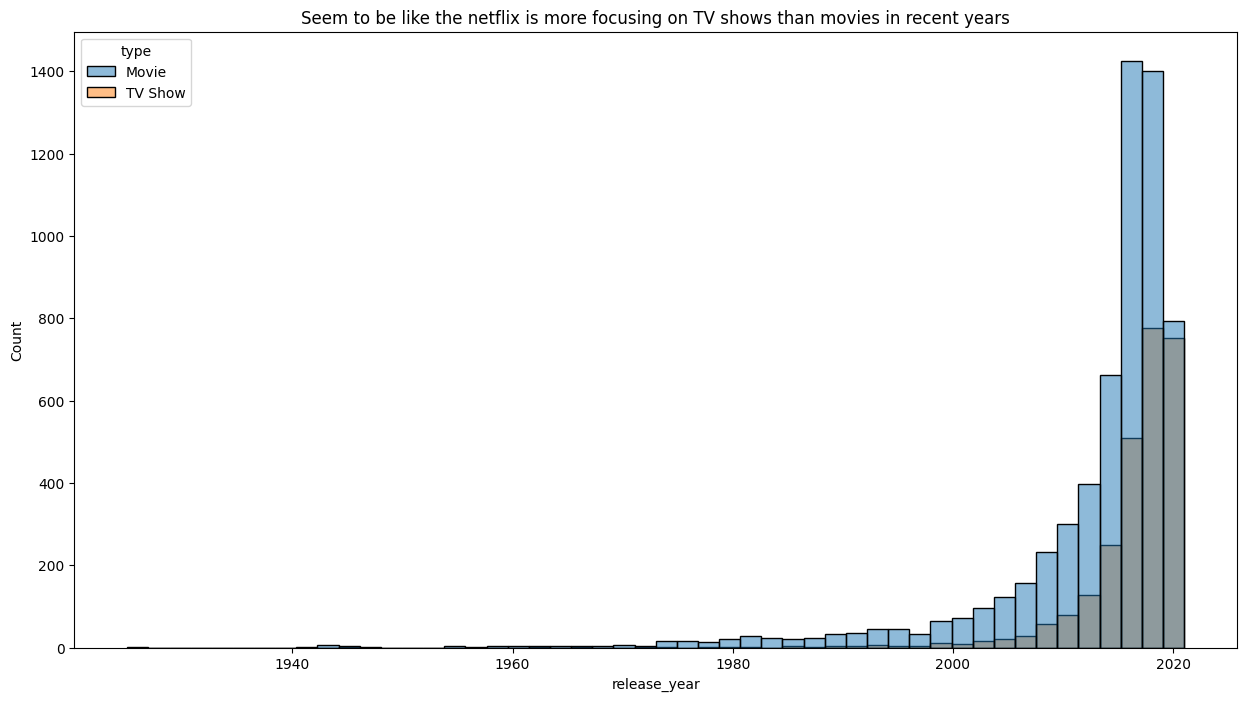

In [ ]:
plt.figure(figsize=(15,8))
sns.histplot(data=netflix,  x=netflix['release_year'], hue=netflix['type'],  bins = 50)
plt.title('Seem to be like the netflix is more focusing on TV shows than movies in recent years')

plt.show()

In [ ]:
data=netflix.copy()
data['cast'] = data['cast'].str.split(',')
data = data.explode('cast')

In [ ]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Gail Mabalane,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Thabang Molaba,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


In [ ]:
data['cast'].value_counts().head(10)

 Anupam Kher         39
 Rupa Bhimani        31
 Takahiro Sakurai    30
 Julie Tejwani       28
 Om Puri             27
 Rajesh Kava         26
Shah Rukh Khan       26
 Yuki Kaji           25
 Paresh Rawal        25
 Andrea Libman       25
Name: cast, dtype: int64

These are the top 10 actors ,worked on most of the movies or TV shows

In [ ]:
data_Gerne=netflix.copy()
data_Gerne['listed_in'] = data_Gerne['listed_in'].str.split(',')
data_Gerne = data_Gerne.explode('listed_in')

data_Gerne['listed_in'].value_counts()

 International Movies        2624
Dramas                       1600
Comedies                     1210
Action & Adventure            859
Documentaries                 829
                             ... 
Romantic Movies                 3
Spanish-Language TV Shows       2
LGBTQ Movies                    1
TV Sci-Fi & Fantasy             1
Sports Movies                   1
Name: listed_in, Length: 73, dtype: int64

In [ ]:
data_Gerne['listed_in']=data_Gerne['listed_in'].str.strip()

In [ ]:
data_Gerne['listed_in'].value_counts().head(10)

International Movies        2752
Dramas                      2427
Comedies                    1674
International TV Shows      1351
Documentaries                869
Action & Adventure           859
TV Dramas                    763
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Name: listed_in, dtype: int64

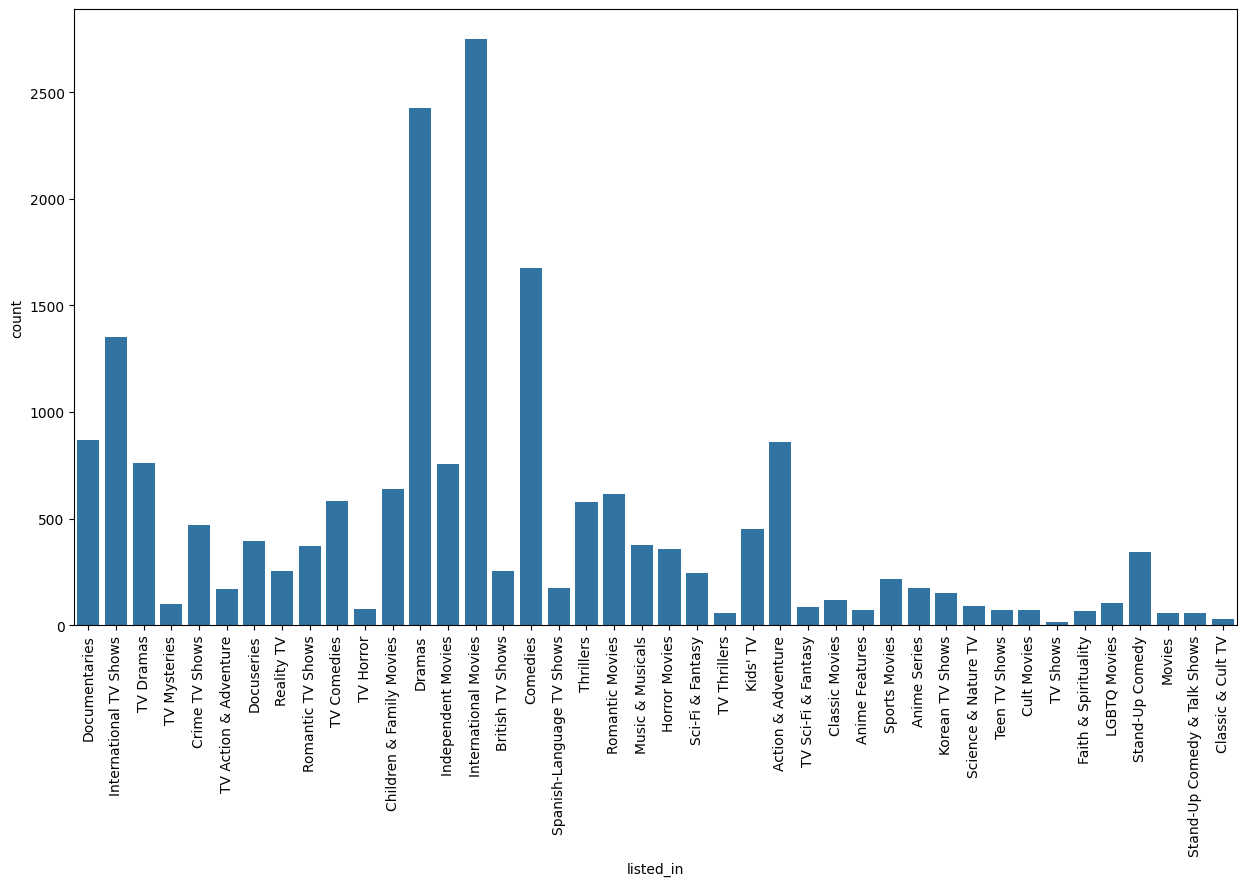

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(data=data_Gerne, x=data_Gerne['listed_in'])
plt.xticks(rotation=90)
plt.show()

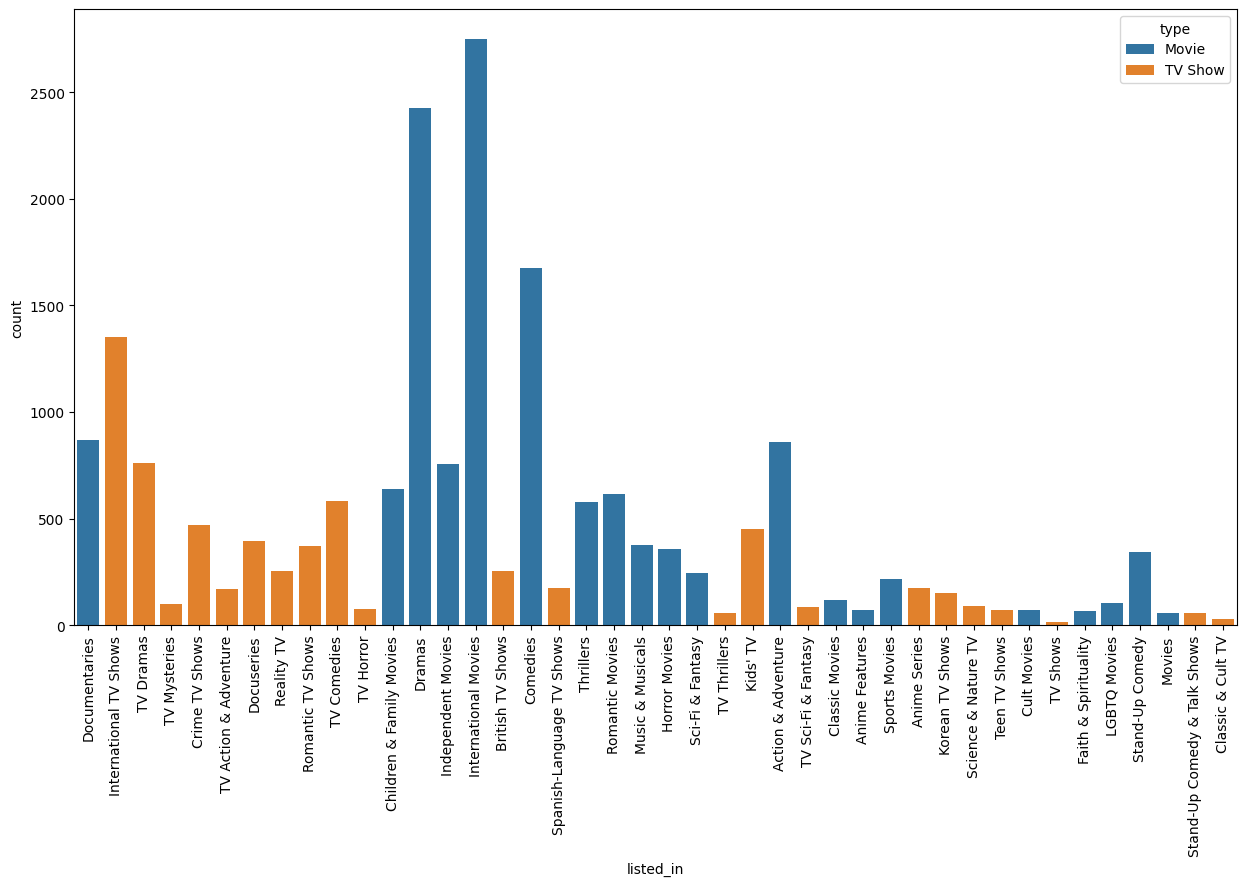

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(data=data_Gerne, x='listed_in', hue='type')
plt.xticks(rotation=90)
plt.show()

In [ ]:
data_Gerne.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19323 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       19323 non-null  object
 1   type          19323 non-null  object
 2   title         19323 non-null  object
 3   director      13439 non-null  object
 4   cast          17819 non-null  object
 5   country       17601 non-null  object
 6   date_added    19303 non-null  object
 7   release_year  19323 non-null  int64 
 8   rating        19317 non-null  object
 9   duration      19320 non-null  object
 10  listed_in     19323 non-null  object
 11  description   19323 non-null  object
dtypes: int64(1), object(11)
memory usage: 1.9+ MB


In [ ]:
data_Gerne['listed_in']=data_Gerne['listed_in'].str.strip()

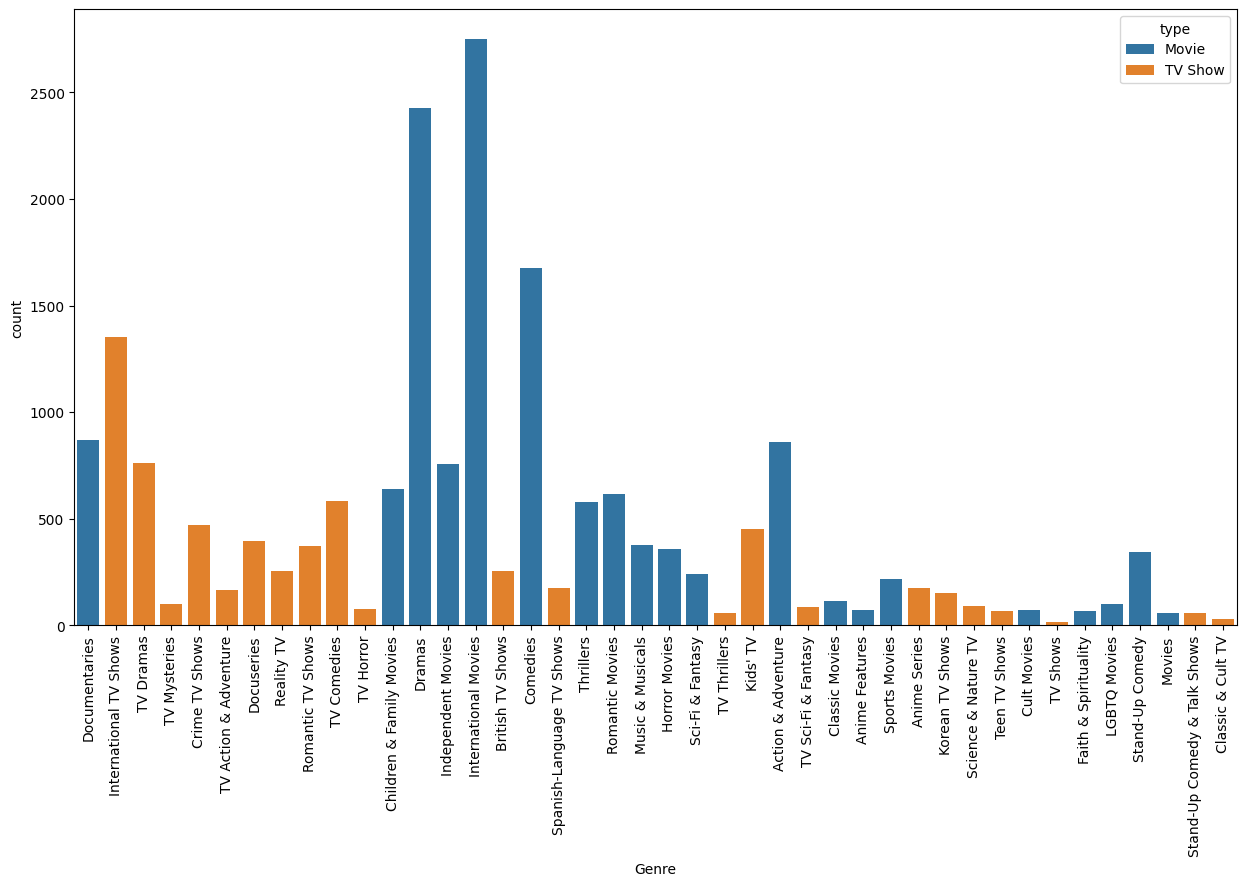

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(data=data_Gerne, x='listed_in', hue='type')
plt.xticks(rotation=90)
plt.xlabel('Genre')
plt.show()

It seems like International TV shows and International Movies are most likely to be added on netflix

In [ ]:
data_Gerne['country'].unique()

array(['United States', 'South Africa', nan, 'India',
       'United States, Ghana, Burkina Faso, United Kingdom, Germany, Ethiopia',
       'United Kingdom', 'Germany, Czech Republic', 'Mexico', 'Turkey',
       'Australia', 'United States, India, France', 'Finland',
       'China, Canada, United States',
       'South Africa, United States, Japan', 'Nigeria', 'Japan',
       'Spain, United States', 'France', 'Belgium',
       'United Kingdom, United States', 'United States, United Kingdom',
       'France, United States', 'South Korea', 'Spain',
       'United States, Singapore', 'United Kingdom, Australia, France',
       'United Kingdom, Australia, France, United States',
       'United States, Canada', 'Germany, United States',
       'South Africa, United States', 'United States, Mexico',
       'United States, Italy, France, Japan',
       'United States, Italy, Romania, United Kingdom',
       'Australia, United States', 'Argentina, Venezuela',
       'United States, United Kin

Lets check how many unique country's data is available



In [ ]:
data_Gerne['country'] = data_Gerne['country'].str.split(',')
data_Gerne = data_Gerne.explode('country')

data_Gerne['country'].value_counts()

United States     5755
India             2721
United Kingdom    1413
 United States    1025
Japan              619
                  ... 
 Ecuador             1
Somalia              1
 Sudan               1
 Nicaragua           1
 Uganda              1
Name: country, Length: 197, dtype: int64

In [ ]:
data_Gerne['country'].value_counts().head(10)

United States     5755
India             2721
United Kingdom    1413
 United States    1025
Japan              619
South Korea        595
Canada             530
France             505
Spain              473
 France            411
Name: country, dtype: int64

In [ ]:
data_Gerne['country']=data_Gerne['country'].str.strip()

In [ ]:
data_Gerne['country'].nunique()

123

i.e Netflix content is present from 123 Countrys

How has the number of movies released per year changed over the last 20-30 years?

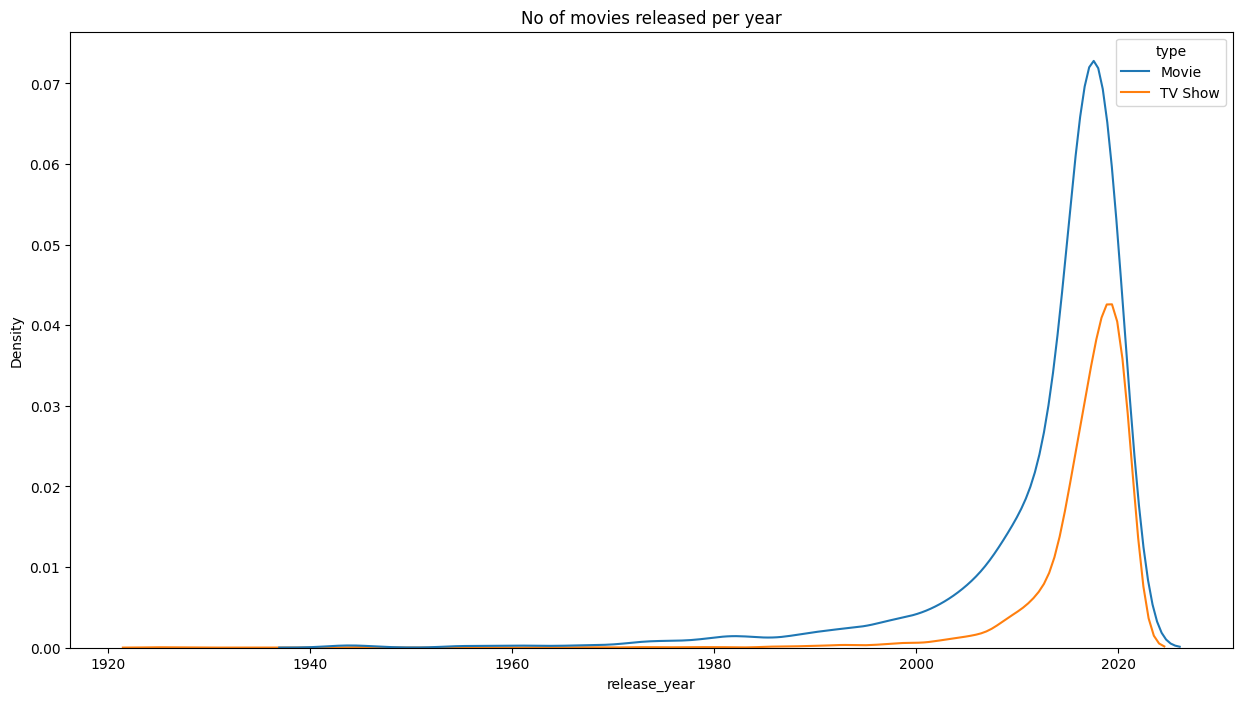

In [ ]:
plt.figure(figsize=(15,8))
sns.kdeplot(data=netflix,  x=netflix['release_year'], hue=netflix['type'])
plt.title('No of movies released per year')

plt.show()

In [ ]:
netflix['release_year'].max()

2021

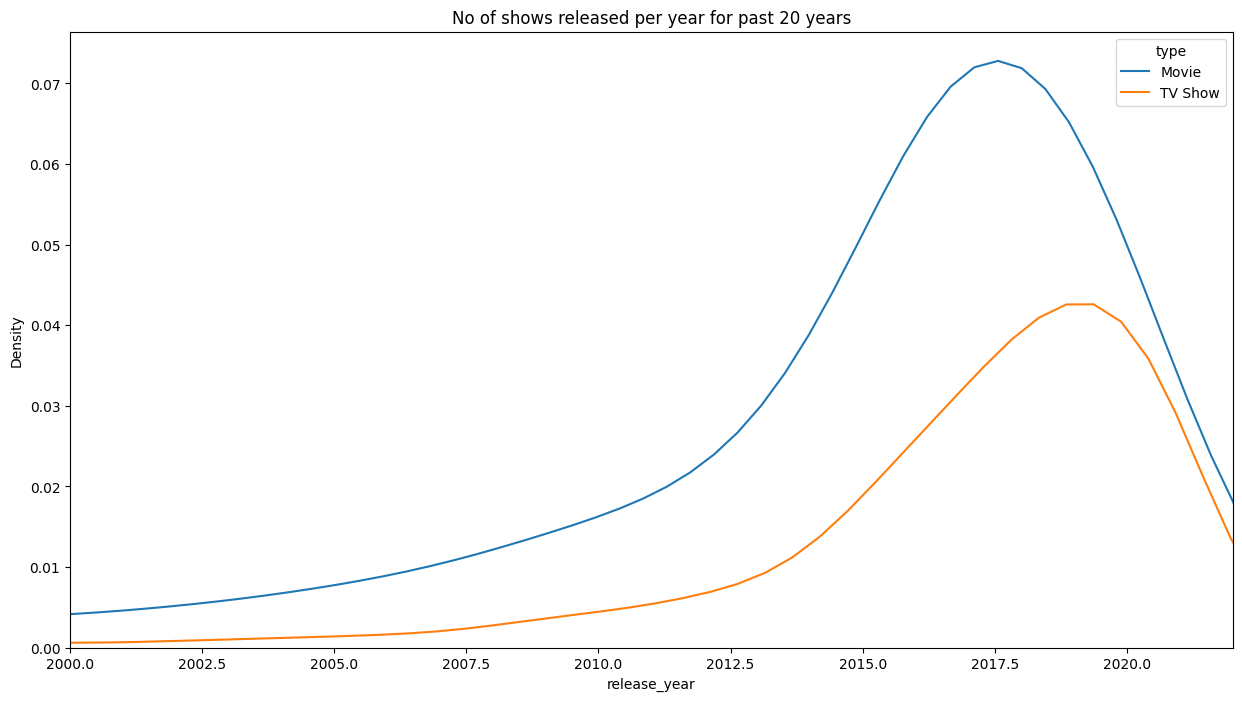

In [ ]:
plt.figure(figsize=(15,8))
sns.kdeplot(data=netflix,  x=netflix['release_year'], hue=netflix['type'])
plt.xlim(2000,2022)
plt.title('No of shows released per year for past 20 years')

plt.show()

Now, we can proceed with each analysis based on the questions provided. Let's start with:

### **1. Type of Content Available in Different Countries:**
Lets analyze the distribution of movies and TV shows across different countries to understand the variety of content available in each region.
To analyze the distribution of movies and TV shows across different countries, we can group the data by the "country" column and then count the number of movies and TV shows in each country. Let's proceed with this analysis:

In [ ]:
# Group the data by country and type of content, then count the occurrences
content_distribution = data_Gerne.groupby(['country', 'type']).size().unstack(fill_value=0)

# Display the distribution of content across different countries
print(content_distribution)


type          Movie  TV Show
country                     
                 13        2
Afghanistan       2        0
Albania           2        0
Algeria           8        0
Angola            2        0
...             ...      ...
Vatican City      3        0
Venezuela         8        0
Vietnam          20        0
West Germany      8        3
Zimbabwe          7        0

[123 rows x 2 columns]


### **2. Number of Movies Released Over Time:**

We'll examine the number of movies released per year over the last 20-30 years to observe any trends or fluctuations.
To analyze the number of movies released per year, we'll group the data by the "release_year" column and then count the occurrences of movies for each year.

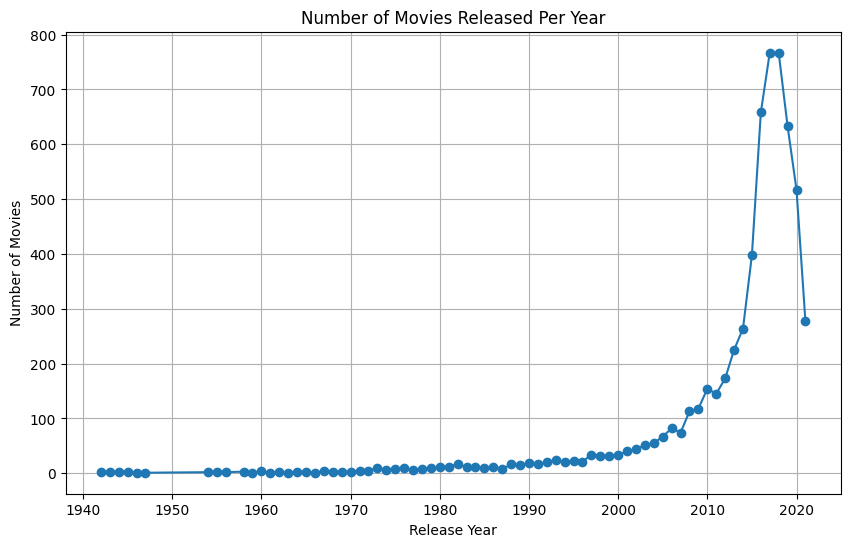

In [ ]:
import matplotlib.pyplot as plt

# Group the data by release year and type (only movies), then count the occurrences
movies_per_year = netflix[netflix['type'] == 'Movie'].groupby('release_year').size()

# Plotting the number of movies released per year
plt.figure(figsize=(10, 6))
plt.plot(movies_per_year.index, movies_per_year.values, marker='o', linestyle='-')
plt.title('Number of Movies Released Per Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.grid(True)
plt.show()

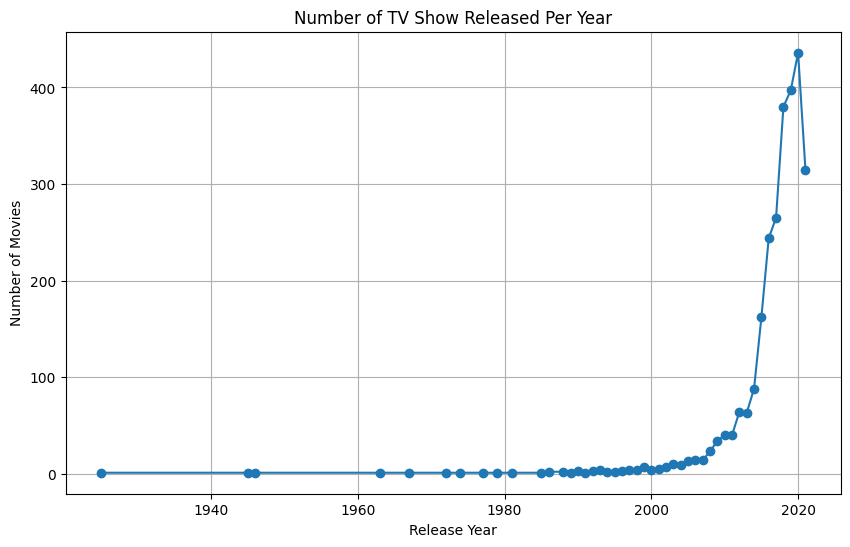

In [ ]:
import matplotlib.pyplot as plt

# Group the data by release year and type (only movies), then count the occurrences
movies_per_year = netflix[netflix['type'] == 'TV Show'].groupby('release_year').size()

# Plotting the number of movies released per year
plt.figure(figsize=(10, 6))
plt.plot(movies_per_year.index, movies_per_year.values, marker='o', linestyle='-')
plt.title('Number of TV Show Released Per Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.grid(True)
plt.show()

### **3. Comparison of TV Shows vs. Movies:**

We'll compare the number of TV shows to the number of movies released to see if there's a notable difference in quantity.
To analyze this comparison, we'll count the occurrences of TV shows and movies in the dataset and then visualize the results. Let's proceed with this analysis:

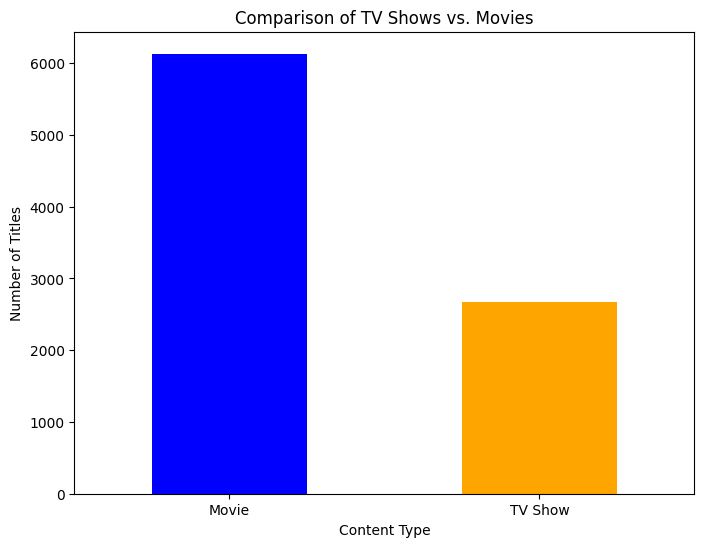

In [ ]:
# Count the occurrences of TV shows and movies
content_counts = netflix['type'].value_counts()

# Plotting the comparison of TV shows vs. movies
plt.figure(figsize=(8, 6))
content_counts.plot(kind='bar', color=['blue', 'orange'])
plt.title('Comparison of TV Shows vs. Movies')
plt.xlabel('Content Type')
plt.ylabel('Number of Titles')
plt.xticks(rotation=0)
plt.show()


### **4. Best Time to Launch a TV Show:**

To analyze the best time to launch a TV show, we can examine the frequency of TV show releases across different months. This will help us identify if there's a particular time of the year that sees more TV show launches.

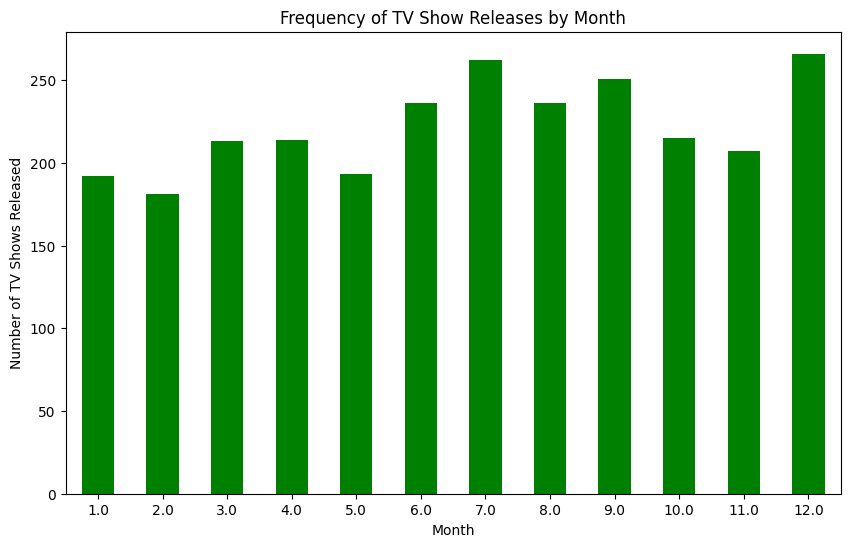

In [ ]:
# Convert 'date_added' column to datetime format
netflix['date_added'] = pd.to_datetime(netflix['date_added'])

# Extract the month from the 'date_added' column for TV shows
tv_shows_monthly = netflix[netflix['type'] == 'TV Show']['date_added'].dt.month

# Plotting the frequency of TV show releases across different months
plt.figure(figsize=(10, 6))
tv_shows_monthly.value_counts().sort_index().plot(kind='bar', color='green')
plt.title('Frequency of TV Show Releases by Month')
plt.xlabel('Month')
plt.ylabel('Number of TV Shows Released')
plt.xticks(rotation=0)
plt.show()


July and December seems to be best time for launching TV show

### **5. Analysis of Actors/Directors:**

We'll analyze the involvement of actors and directors in different types of shows and movies to identify any patterns or preferences.
To perform this analysis, we can examine the most common actors and directors for both movies and TV shows separately. Let's proceed with this analysis:

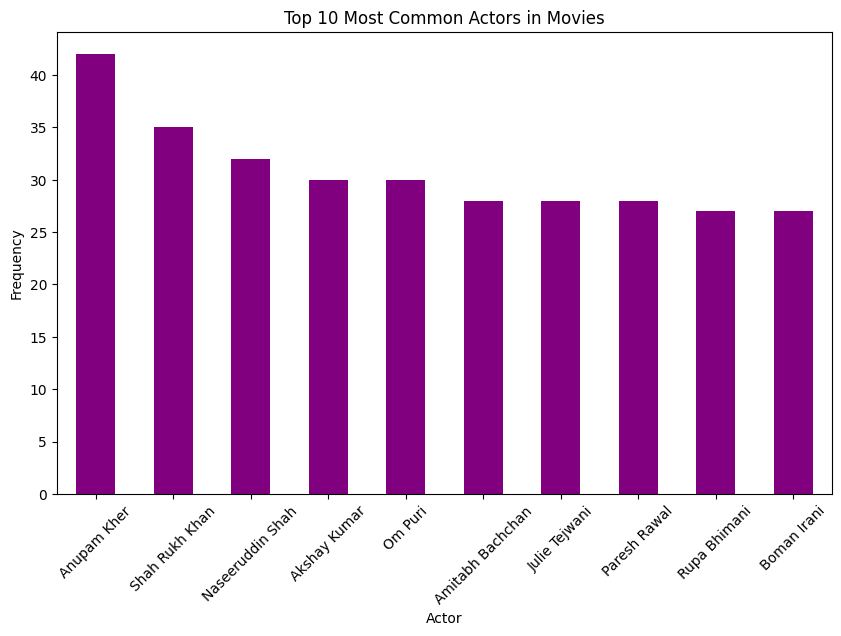

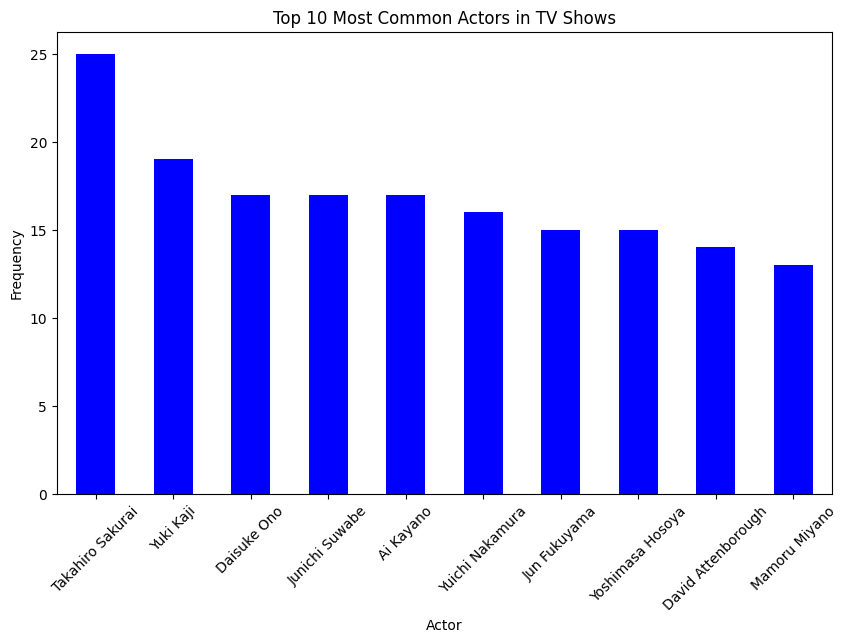

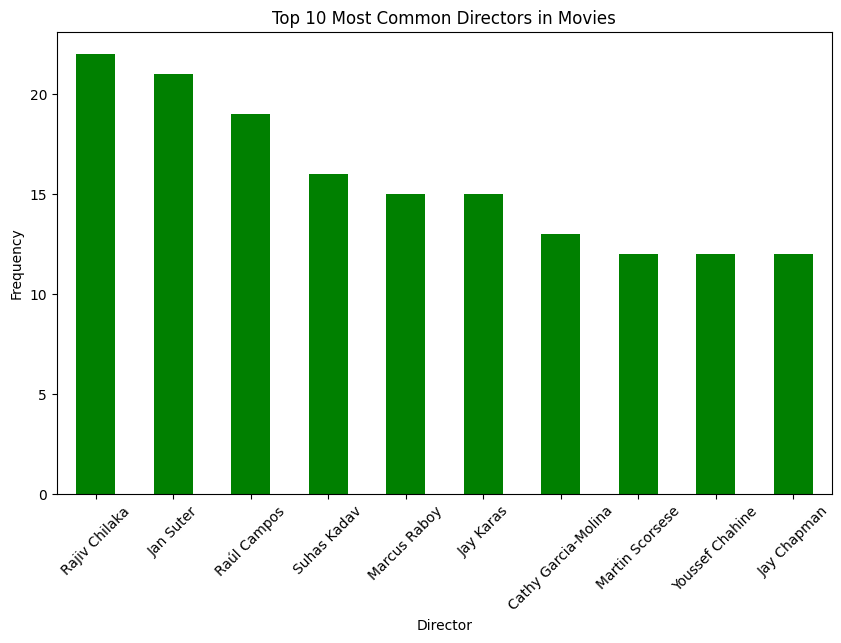

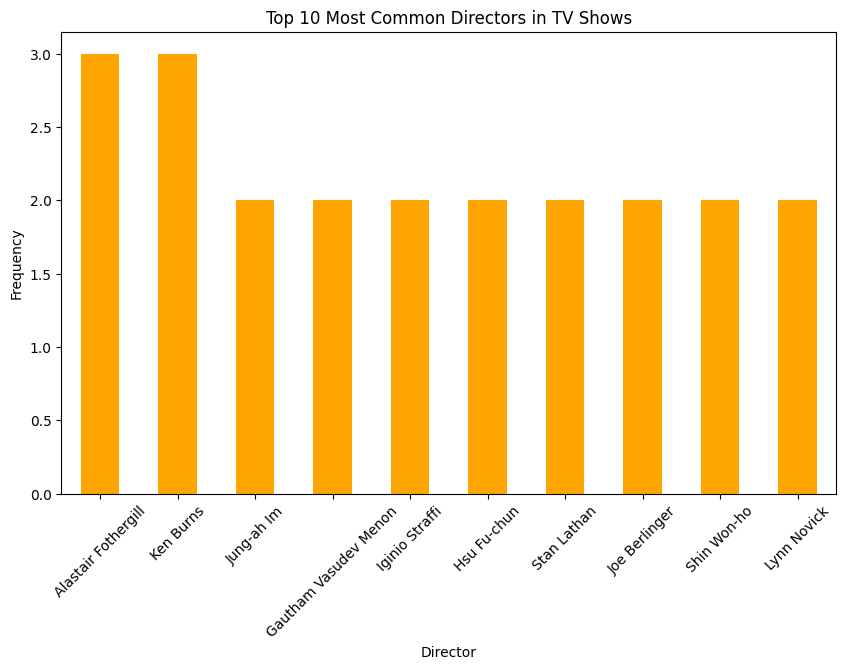

In [ ]:
# Split the 'cast' column into individual actors
actors = netflix['cast'].str.split(', ').explode()

# Split the 'director' column into individual directors
directors = netflix['director'].str.split(', ').explode()

# Plotting the top 10 most common actors in movies
plt.figure(figsize=(10, 6))
actors[netflix['type'] == 'Movie'].value_counts().head(10).plot(kind='bar', color='purple')
plt.title('Top 10 Most Common Actors in Movies')
plt.xlabel('Actor')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# Plotting the top 10 most common actors in TV shows
plt.figure(figsize=(10, 6))
actors[netflix['type'] == 'TV Show'].value_counts().head(10).plot(kind='bar', color='blue')
plt.title('Top 10 Most Common Actors in TV Shows')
plt.xlabel('Actor')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# Plotting the top 10 most common directors in movies
plt.figure(figsize=(10, 6))
directors[netflix['type'] == 'Movie'].value_counts().head(10).plot(kind='bar', color='green')
plt.title('Top 10 Most Common Directors in Movies')
plt.xlabel('Director')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# Plotting the top 10 most common directors in TV shows
plt.figure(figsize=(10, 6))
directors[netflix['type'] == 'TV Show'].value_counts().head(10).plot(kind='bar', color='orange')
plt.title('Top 10 Most Common Directors in TV Shows')
plt.xlabel('Director')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


## **6. Focus of Netflix on TV Shows vs. Movies in** Recent Years:

We'll compare the proportion of TV shows to movies released by Netflix in recent years to understand if there's been a shift in focus.

<Figure size 1000x600 with 0 Axes>

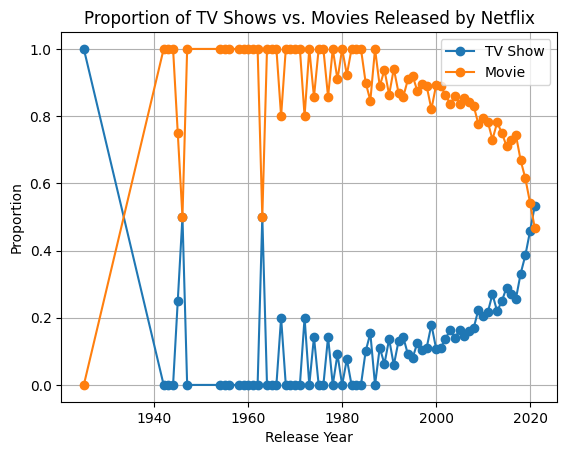

In [ ]:
# Calculate the proportion of TV shows and movies released by Netflix each year
content_proportion = netflix.pivot_table(index='release_year', columns='type', aggfunc='size', fill_value=0)
content_proportion['Total'] = content_proportion.sum(axis=1)
content_proportion['TV Show Proportion'] = content_proportion['TV Show'] / content_proportion['Total']
content_proportion['Movie Proportion'] = content_proportion['Movie'] / content_proportion['Total']

# Plotting the proportion of TV shows vs. movies released by Netflix over time
plt.figure(figsize=(10, 6))
content_proportion[['TV Show Proportion', 'Movie Proportion']].plot(kind='line', marker='o')
plt.title('Proportion of TV Shows vs. Movies Released by Netflix')
plt.xlabel('Release Year')
plt.ylabel('Proportion')
plt.legend(['TV Show', 'Movie'])
plt.grid(True)
plt.show()


### **7. Understanding Content Availability in Different Countries:**

To understand the content availability in different countries, we can analyze the distribution of genres (listed_in) across various regions.

              Action & Adventure  Anime Features  Anime Series  \
country                                                          
                               0               0             0   
Afghanistan                    0               0             0   
Albania                        0               0             0   
Algeria                        0               0             0   
Angola                         1               0             0   
...                          ...             ...           ...   
Vatican City                   0               0             0   
Venezuela                      0               0             0   
Vietnam                        2               0             0   
West Germany                   0               0             0   
Zimbabwe                       0               0             0   

              British TV Shows  Children & Family Movies  Classic & Cult TV  \
country                                                       

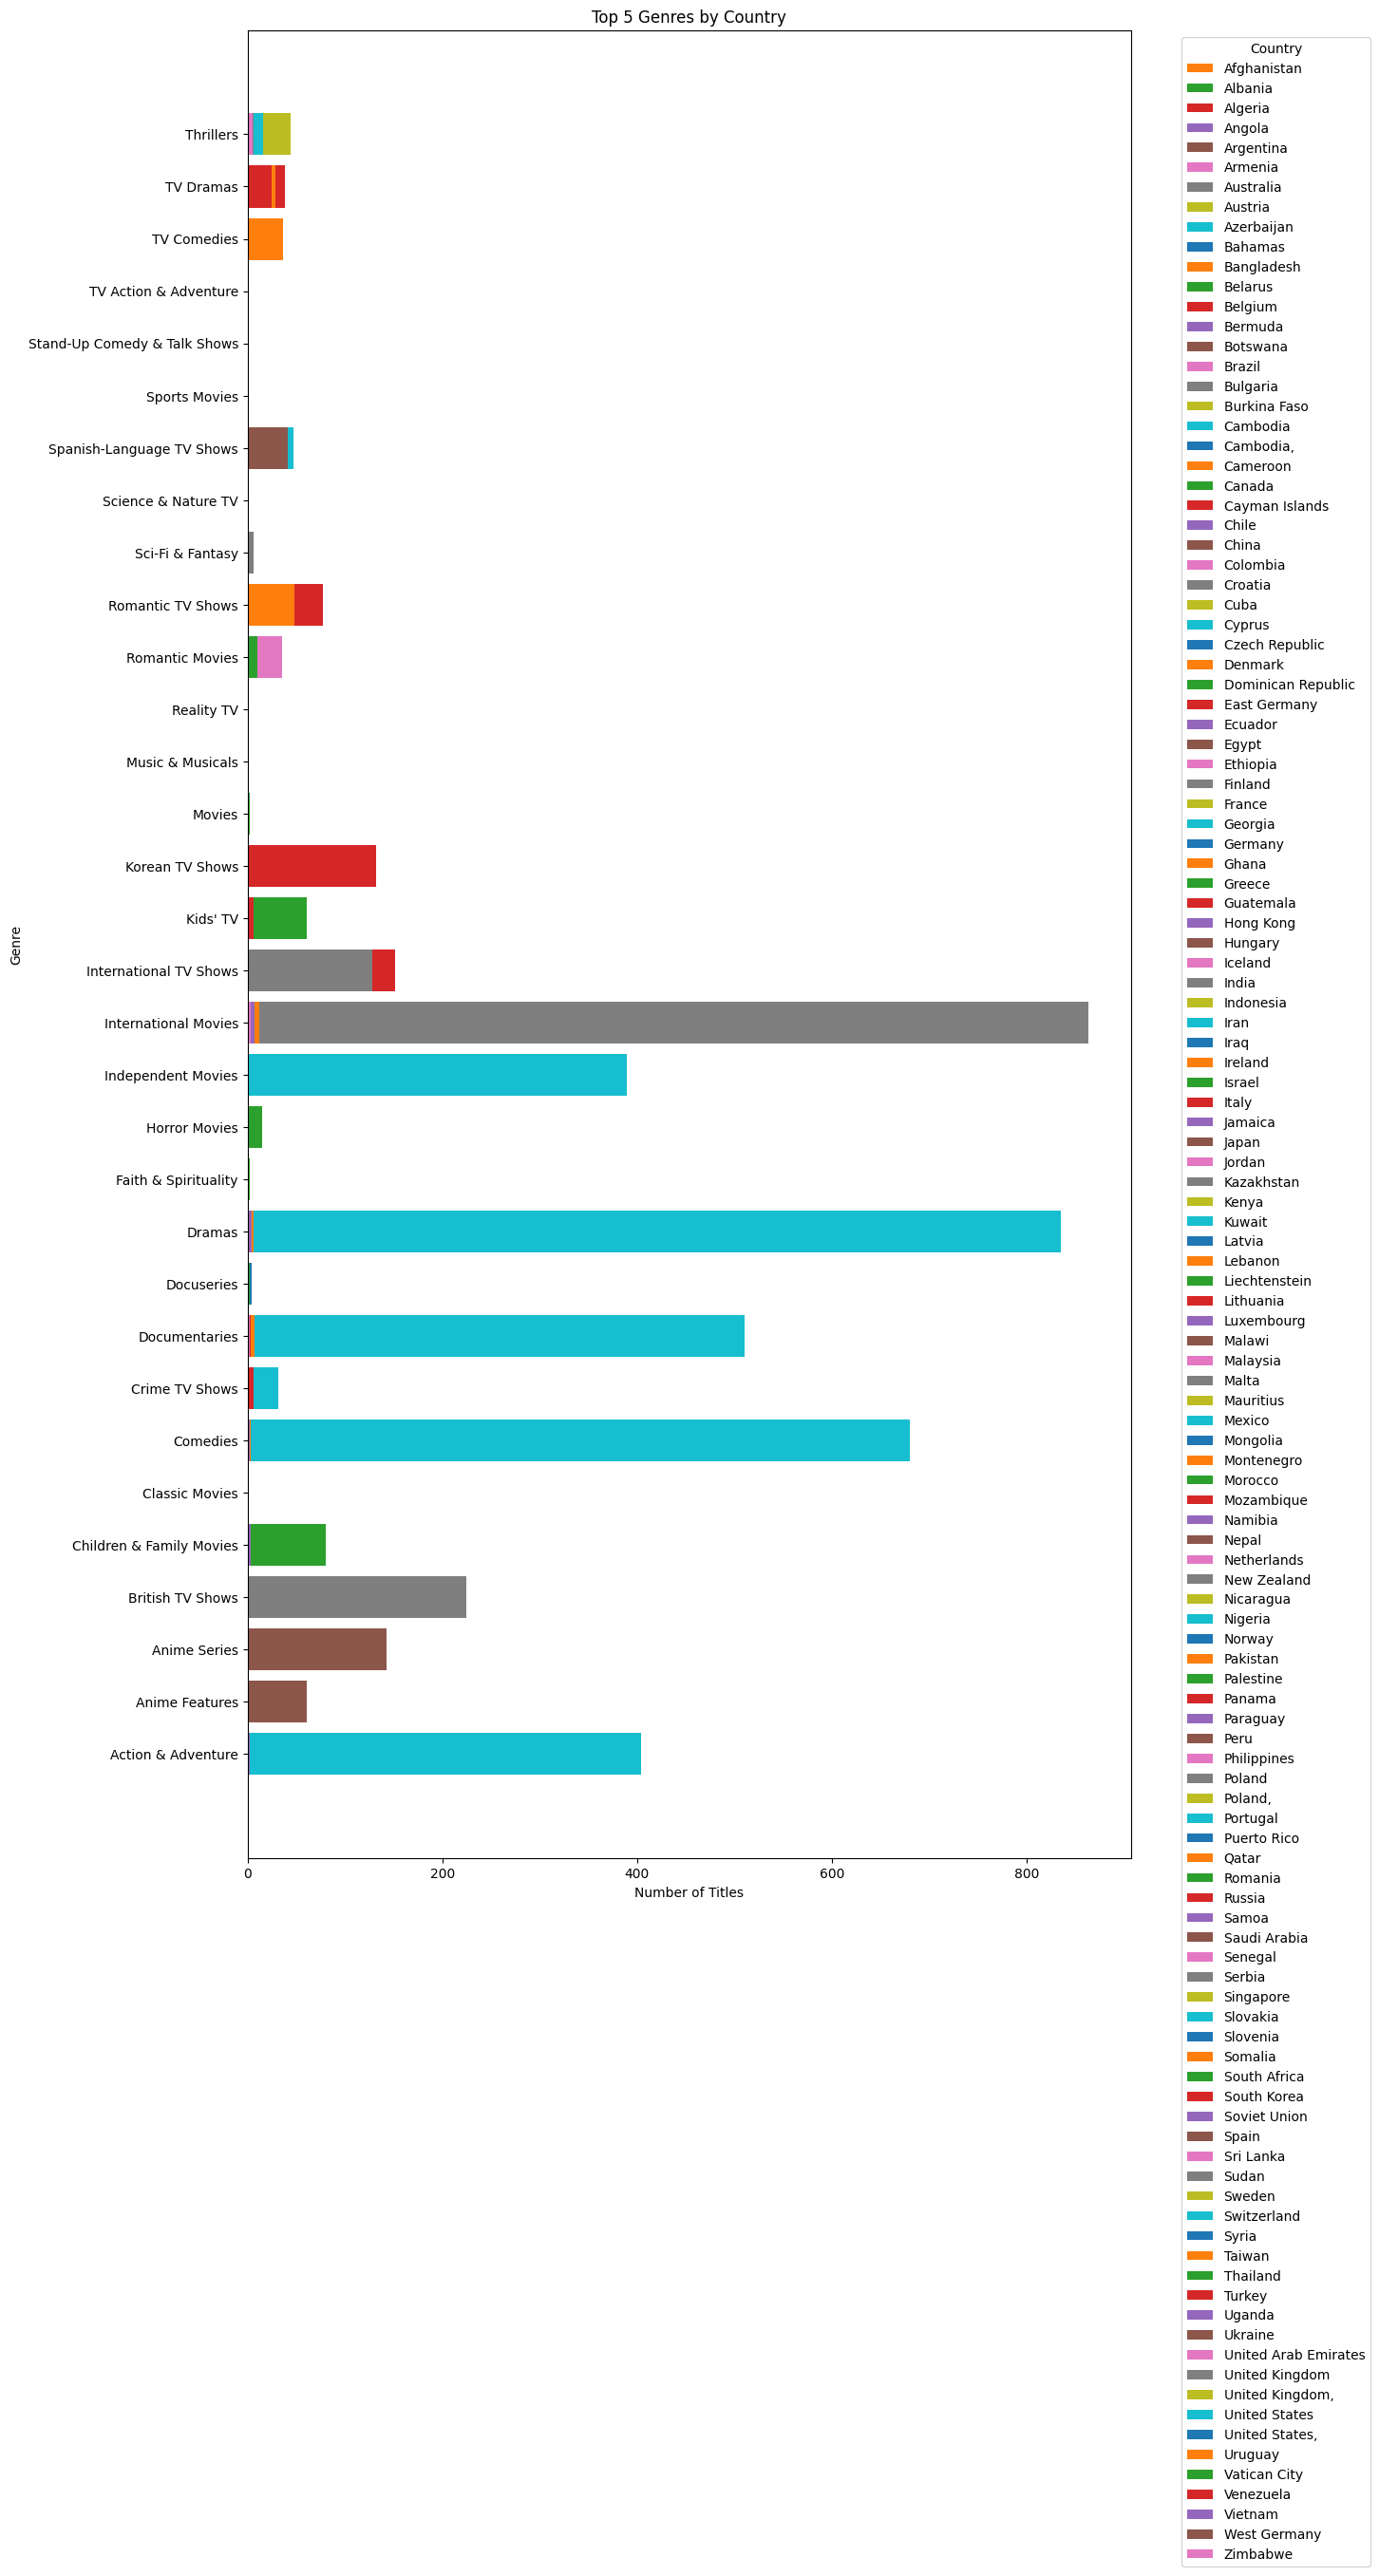

In [ ]:
import matplotlib.pyplot as plt
# Split rows with multiple countries into separate rows
df_split_countries = netflix.assign(country=netflix['country'].str.split(', ')).explode('country')

# Split the 'listed_in' column into individual genres
genres = df_split_countries['listed_in'].str.split(', ').explode()

# Count the occurrences of each genre for each country
genre_distribution = df_split_countries.groupby('country')['listed_in'].apply(lambda x: x.str.split(', ').explode().value_counts())

# Unstack the genre distribution
genre_distribution = genre_distribution.unstack(fill_value=0)

# Display the distribution of genres across different countries
print(genre_distribution)

# Get the top 5 genres for each country
top_genres_by_country = genre_distribution.apply(lambda x: x.sort_values(ascending=False).head(5), axis=1)

# Plotting
plt.figure(figsize=(12, 25))

for country in top_genres_by_country.index:
    plt.barh(top_genres_by_country.loc[country].index, top_genres_by_country.loc[country].values, label=country)

plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.title('Top 5 Genres by Country')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


Now lets explore the data at column level

In [ ]:
constraint=netflix['cast'].apply(lambda x: str(x).split(', ')).tolist()

In [ ]:
df_new=pd.DataFrame(constraint,index=netflix['title'])

In [ ]:
df_new

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
title,,,,,,,,,,,,,,,,,,,,,
Dick Johnson Is Dead,nan,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
Blood & Water,Ama Qamata,Khosi Ngema,Gail Mabalane,Thabang Molaba,Dillon Windvogel,Natasha Thahane,Arno Greeff,Xolile Tshabalala,Getmore Sithole,Cindy Mahlangu,...,None,None,None,None,None,None,None,None,None,None
Ganglands,Sami Bouajila,Tracy Gotoas,Samuel Jouy,Nabiha Akkari,Sofia Lesaffre,Salim Kechiouche,Noureddine Farihi,Geert Van Rampelberg,Bakary Diombera,None,...,None,None,None,None,None,None,None,None,None,None
Jailbirds New Orleans,nan,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
Kota Factory,Mayur More,Jitendra Kumar,Ranjan Raj,Alam Khan,Ahsaas Channa,Revathi Pillai,Urvi Singh,Arun Kumar,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zodiac,Mark Ruffalo,Jake Gyllenhaal,Robert Downey Jr.,Anthony Edwards,Brian Cox,Elias Koteas,Donal Logue,John Carroll Lynch,Dermot Mulroney,Chloë Sevigny,...,None,None,None,None,None,None,None,None,None,None
Zombie Dumb,nan,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
Zombieland,Jesse Eisenberg,Woody Harrelson,Emma Stone,Abigail Breslin,Amber Heard,Bill Murray,Derek Graf,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [ ]:
df_new=df_new.stack()

In [ ]:
df_new

title                  
Dick Johnson Is Dead  0                      nan
Blood & Water         0               Ama Qamata
                      1              Khosi Ngema
                      2            Gail Mabalane
                      3           Thabang Molaba
                                   ...          
Zubaan                3         Manish Chaudhary
                      4             Meghna Malik
                      5            Malkeet Rauni
                      6           Anita Shabdish
                      7    Chittaranjan Tripathy
Length: 64951, dtype: object

In [ ]:
df_new=pd.DataFrame(df_new).reset_index()

In [ ]:
df_new=df_new[['title', 0]]
df_new.columns=['title', 'cast']

In [ ]:
df_new

,title,cast
0,Dick Johnson Is Dead,nan
1,Blood & Water,Ama Qamata
2,Blood & Water,Khosi Ngema
3,Blood & Water,Gail Mabalane
4,Blood & Water,Thabang Molaba
...,...,...
64946,Zubaan,Manish Chaudhary
64947,Zubaan,Meghna Malik
64948,Zubaan,Malkeet Rauni
64949,Zubaan,Anita Shabdish


<Axes: xlabel='rating', ylabel='count'>

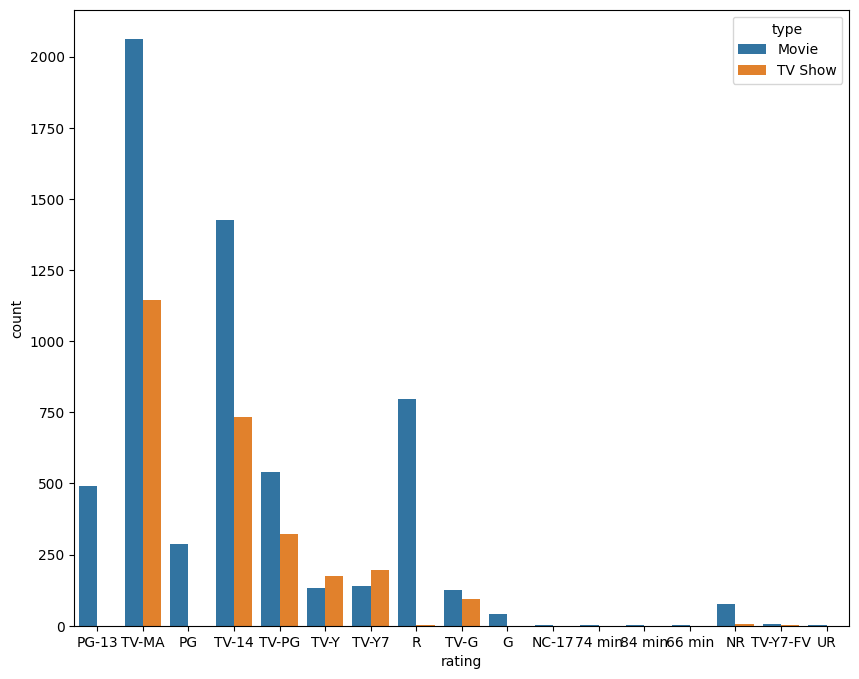

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
sns.countplot(x='rating', hue='type', data=netflix)

TV-MA Mature Audience Only : This program is specifically designed to be viewed by adults and therefore may be unsuitable for children under 17. Since netflix is paid platform, so its obvious that the customer are adults.

Still their are some categories where onlt Movies is seen to have higher count

Is their any relation between release date or month or day with type of show?

In [ ]:
netflix_dt=netflix.copy()
netflix_dt['month']=netflix['date_added'].dt.month.fillna(-1)
netflix_dt['dayofweek']=netflix['date_added'].dt.dayofweek.fillna(-1)
netflix_dt['daysinmonth']=netflix['date_added'].dt.daysinmonth.fillna(-1)
netflix_dt['quarter']=netflix['date_added'].dt.quarter.fillna(-1)

In [ ]:
netflix_dt.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month,dayofweek,daysinmonth,quarter
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9.0,5.0,30.0,3.0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9.0,4.0,30.0,3.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9.0,4.0,30.0,3.0
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",9.0,4.0,30.0,3.0
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,9.0,4.0,30.0,3.0


<Axes: xlabel='quarter', ylabel='count'>

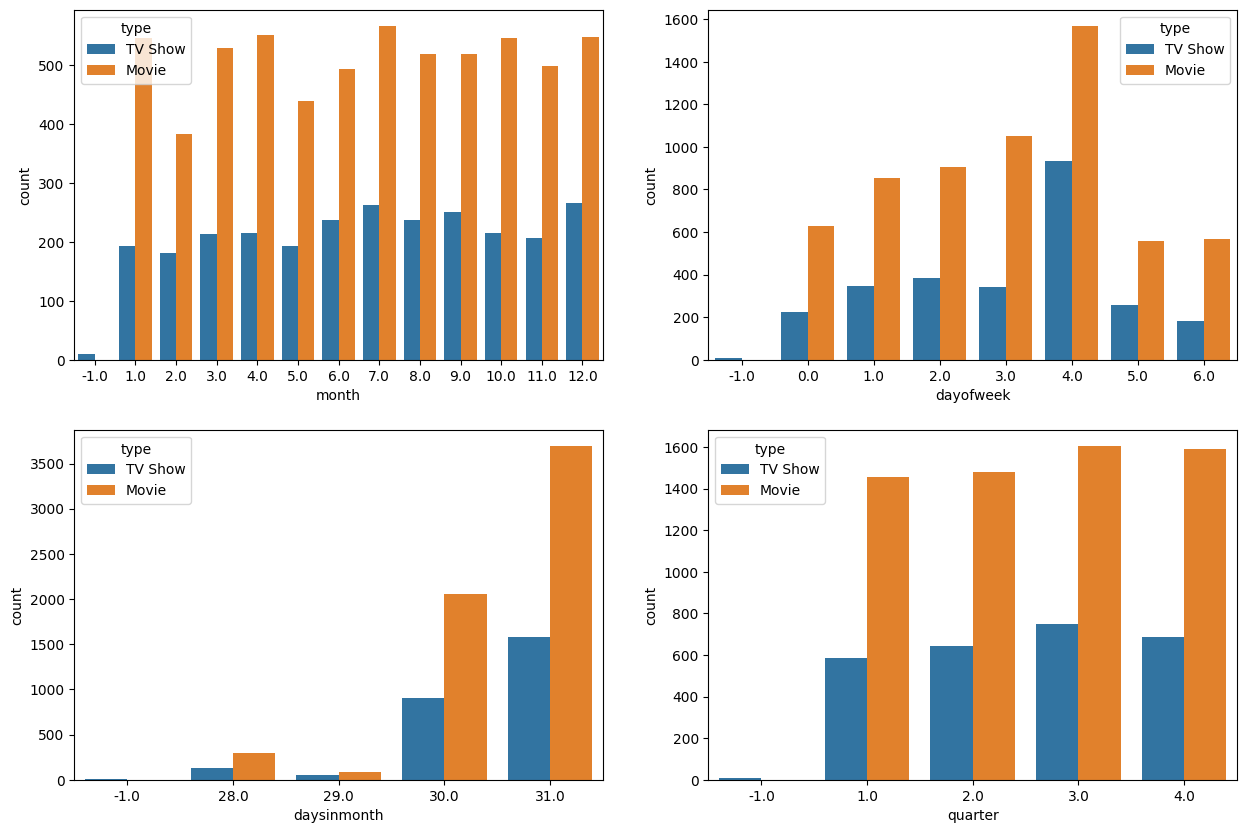

In [ ]:
fig=plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
sns.countplot(data=netflix_dt, x='month', hue='type')

plt.subplot(2,2,2)
sns.countplot(data=netflix_dt, x='dayofweek', hue='type')

plt.subplot(2,2,3)
sns.countplot(data=netflix_dt, x='daysinmonth', hue='type')

plt.subplot(2,2,4)
sns.countplot(data=netflix_dt, x='quarter', hue='type')

From plot 2, we can say most of movies and Tv shows were added on **Friday**

From plot 3, we can say most of movies and Tv shows were added at the end day of month **ie 30 or 31 of month**

From plot 1,4: we can give much info